In [24]:
import pygsp as p
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams

# Criando os dados e calculando o diagrama de persistência

In [25]:
# função que define os dados
def start_points(n = 100, r = 1, eps = 0.2):
    ps = []
    n = 100
    for i in range(n):
        theta = np.random.uniform(0, 2 * np.pi)
        eps = np.random.uniform(-0.2, 0.2)
        x, y  = (r + eps) * np.cos(theta), (r + eps) * np.sin(theta)
        ps += [[x,y]]
    return np.array([np.array(q) for q in ps])

In [26]:
data = start_points()

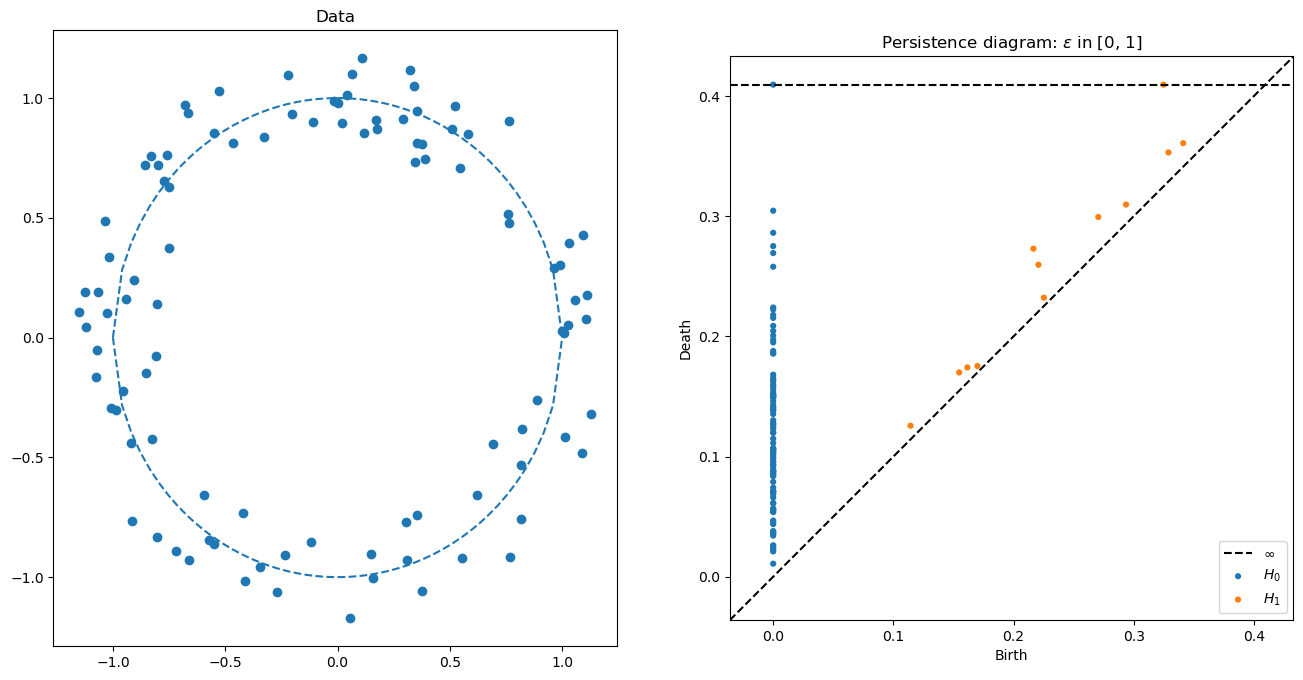

In [174]:
# verificando que os pontos estão perto de um círculo
fig, ax = plt.subplots(1, 2, figsize = (16,8))

ax[0].set_title('Data')
ax[1].set_title(r'Persistence diagram: $\epsilon$ in [0, 1]')

ax[0].scatter([q[0] for q in data], [q[1] for q in data])
ax[0].plot(np.linspace(-1,1), np.sqrt(1 - np.linspace(-1, 1) ** 2), '--', color = 'tab:blue')
ax[0].plot(np.linspace(-1,1), -np.sqrt(1 - np.linspace(-1, 1) ** 2), '--', color = 'tab:blue')
diagrams = ripser(data, thresh=1)['dgms'] #thresh é maior valor de epsilon que a função considera
plot_diagrams(diagrams, show=True)

plt.show()

# Criando o sinal

In [70]:
# definindo um sinal constante = a, o sinal retornado é a função que vale a + ruído entre -r e r
def random_signal(data, a, r):
    s = a * np.ones(len(data)) + np.random.uniform(-r, r, size = len(data))
    return s

In [103]:
s_noisy = random_signal(data, 10, 5)

In [104]:
#definindo o grafo NN tipo radial nos pontos definidos acima com epsilon = eps
eps = 1
G = p.graphs.NNGraph(Xin = data, NNtype = 'radius', epsilon = eps)

In [105]:
G.is_connected()

True

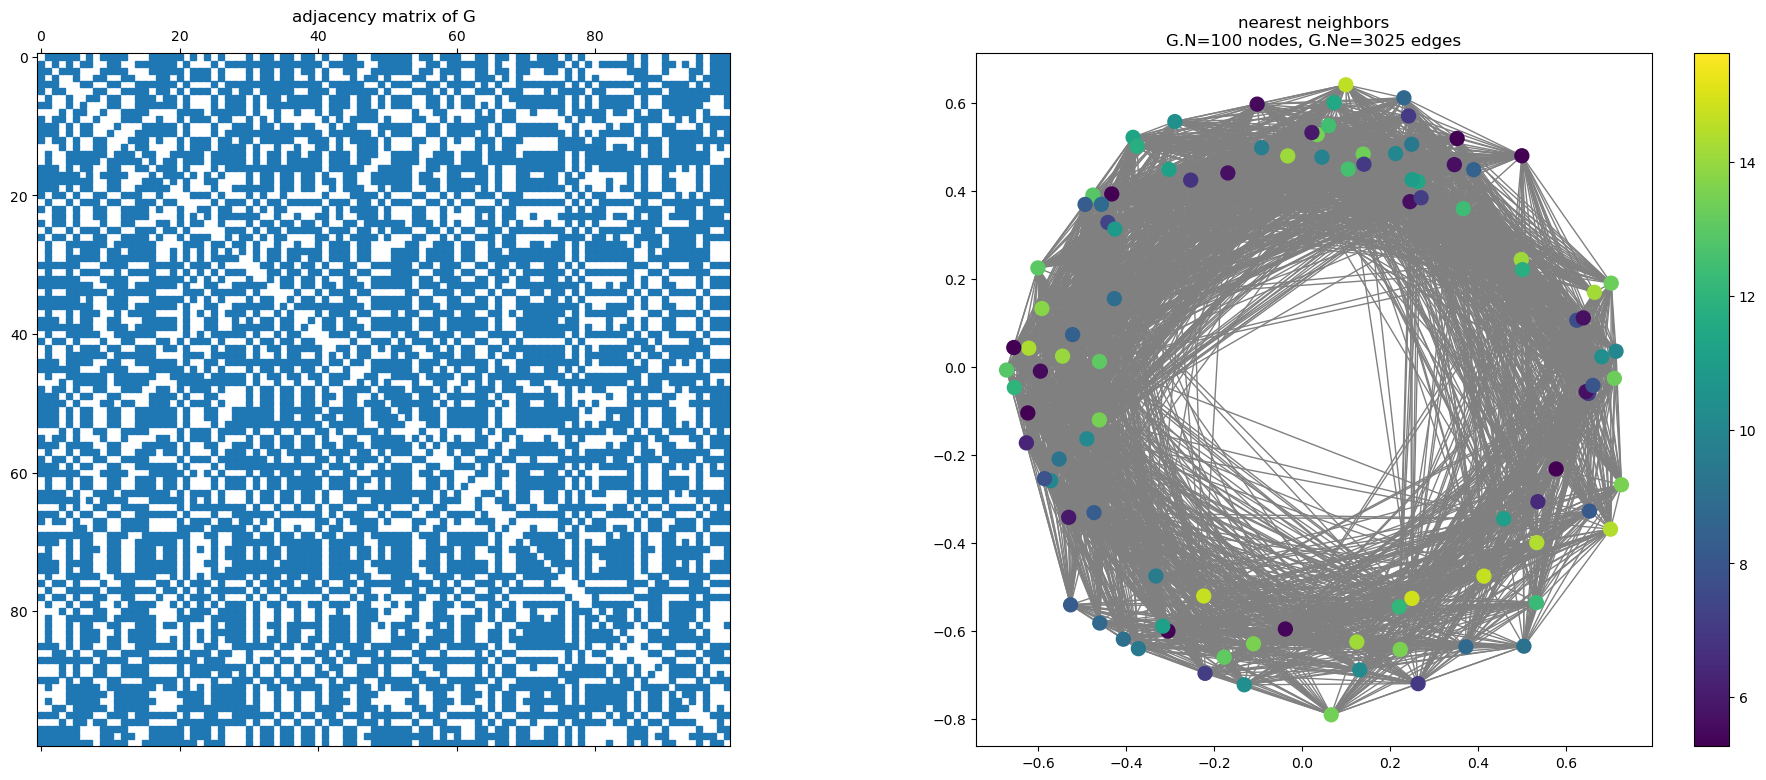

In [106]:
fig, ax = plt.subplots(1, 2, figsize = (24, 9))
ax[0].spy(G.W, markersize=5)
# G.plot(ax=axes[1])
G.plot_signal(s_noisy, ax=ax[1])

ax[0].set_title("adjacency matrix of G")
plt.show()

# GFT

In [107]:
G.compute_fourier_basis() #calculando a matriz de autovetores U

In [108]:
s_hat = G.gft(s_noisy) # transformada de fourier 
s_star = G.igft(s_hat) #transformada da matriz inversa
max(s_noisy - s_star) #boa aproximação

4.796163466380676e-14

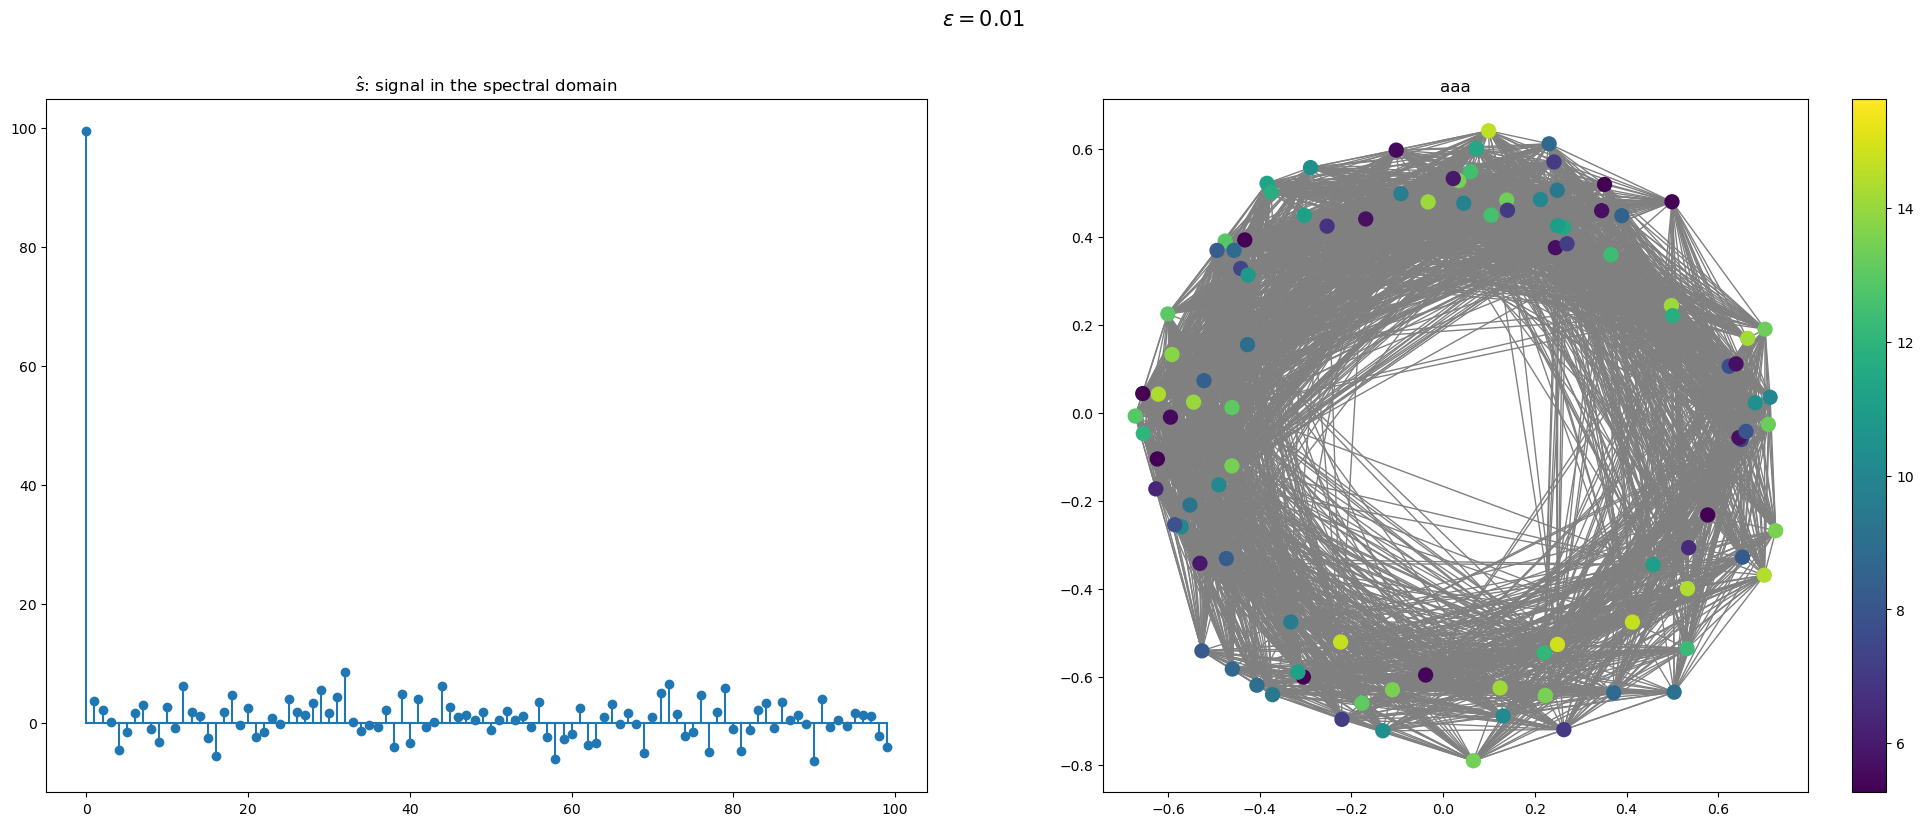

In [151]:
fig, ax = plt.subplots(1, 2, figsize = (25, 9))
# ax = [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]

#plotando s_hat
for i,si in enumerate(s_hat):
    ax[0].plot([i, i],[0, si], color = 'tab:blue')
ax[0].scatter(np.arange(len(s_hat)), s_hat)
ax[0].plot([0, len(s_hat) - 1], [0, 0])

#plotando s
G.plot_signal(s_noisy, ax = ax[1])

ax[0].set_title(r'$\hat s$: signal in the spectral domain', )
#plotando o filtro

#plotando o sinal após o filtro

fig.suptitle(r'$\varepsilon = 0.0$' + str(1), fontsize = 15)
# plt.savefig('imgs/' + str(int(eps * 100))) #descomentar para salvar imagem
plt.show()

In [165]:
# the filter:
tau = 1
def h(x):
    return 1. / (1. + tau * x)
g = p.filters.Filter(G, h)

In [166]:
s_denoised = g.filter(s_noisy, method='exact')
s_denoised_hat = G.gft(s_denoised)

In [133]:
max(np.abs(s_denoised - 10))

0.8664089381061331

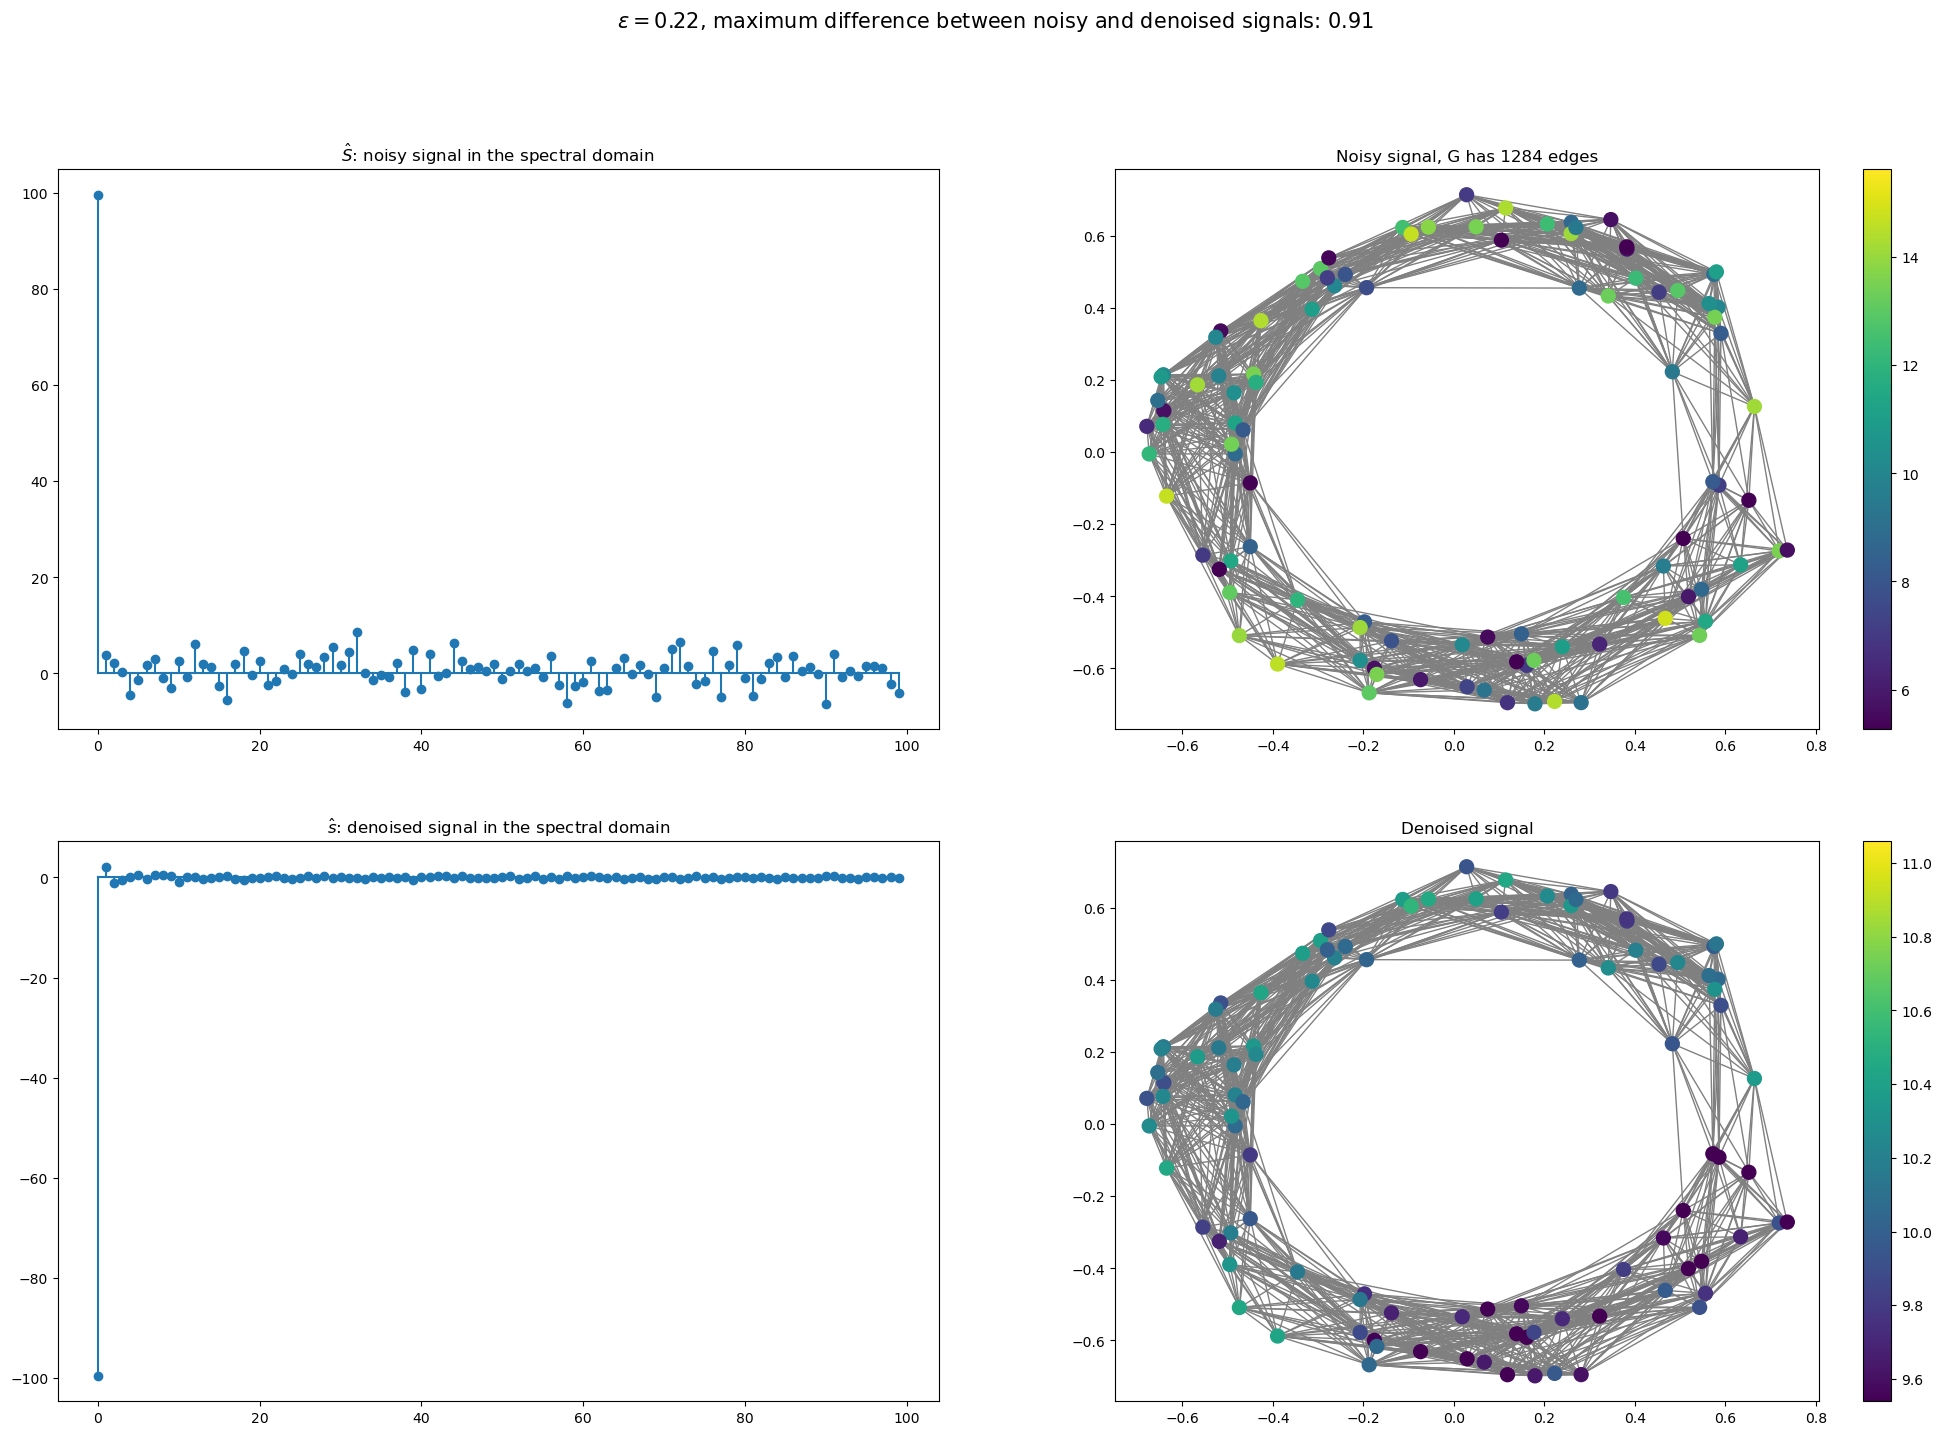

In [178]:
fig, ax = plt.subplots(2, 2, figsize = (25, 16))
ax = [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]

#plotando s_hat
for i,si in enumerate(s_hat):
    ax[0].plot([i, i],[0, si], color = 'tab:blue')
ax[0].scatter(np.arange(len(s_hat)), s_hat)
ax[0].plot([0, len(s_hat) - 1], [0, 0])

#plotando s
G.plot_signal(s_noisy, ax = ax[1])
ax[1].set_title('Noisy signal, G has ' + str(G.Ne) + ' edges')

ax[0].set_title(r'$\hat S$: noisy signal in the spectral domain', )

#plotando s_denoised_hat
for i,si in enumerate(s_denoised_hat):
    ax[2].plot([i, i],[0, si], color = 'tab:blue')
ax[2].scatter(np.arange(len(s_denoised_hat)), s_denoised_hat)
ax[2].plot([0, len(s_denoised_hat) - 1], [0, 0])
ax[2].set_title(r'$\hat s$: denoised signal in the spectral domain', )


#plotando o filtro
G.plot_signal(s_denoised, ax = ax[3])
ax[3].set_title('Denoised signal')


fig.suptitle(r'$\varepsilon = $' + str(np.round(eps, 2)) + ', maximum difference between noisy and denoised signals: ' + str(np.round(max(np.abs(s_denoised - 10)), 2)), fontsize = 15)
# plt.savefig('imgs/' + str(int(eps * 100))) #descomentar para salvar imagem
plt.show()

In [187]:
max_differences = []

In [2]:
# # código para salvar as imagens para fazer um gif, comentado para diminuir tamanho do notebook
# for j, eps in enumerate(np.arange(0.01, 1, 0.01)):
# # eps = 0.4
#     #definir o grafo
#     G = p.graphs.NNGraph(Xin = data, NNtype = 'radius', epsilon = eps)

#     #definir o filtro
#     g = p.filters.Filter(G, h)

#     #calcular matriz de autovetores
#     G.compute_fourier_basis()

#     #calcular gft do sinal com ruído
#     s_noisy_hat = G.gft(s_noisy)

#     #sinal após passar o filtro
#     s_denoised = g.filter(s_noisy, method='exact')

#     #calculando gft do sinal "sem" ruído
#     s_denoised_hat = G.gft(s_denoised)
    
#     #guardando o erro (norma infinito) para plotar depois
#     max_differences += [max(np.abs(s_denoised - 10))]

#     fig, ax = plt.subplots(2, 2, figsize = (25, 16))
#     ax = [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]

#     #plotando espectro do sinal com ruído
#     for i,si in enumerate(s_noisy_hat):
#         ax[0].plot([i, i],[0, si], color = 'tab:blue')
#     ax[0].scatter(np.arange(len(s_noisy_hat)), s_noisy_hat)
#     ax[0].plot([0, len(s_noisy_hat) - 1], [0, 0])

#     #plotando sinal com ruído
#     G.plot_signal(s_noisy, ax = ax[1])

#     #plotando espectro do sinal com ruído
#     for i,si in enumerate(s_denoised_hat):
#         ax[2].plot([i, i],[0, si], color = 'tab:blue')
#     ax[2].scatter(np.arange(len(s_denoised_hat)), s_denoised_hat)
#     ax[2].plot([0, len(s_denoised_hat) - 1], [0, 0])

#     #plotando sinal sem ruído
#     G.plot_signal(s_denoised, ax = ax[3])

#     #titulos
#     fig.suptitle(r'$\varepsilon = $' + str(np.round(eps, 2)) + ', maximum difference between noisy and denoised signals: ' + str(np.round(max(np.abs(s_denoised - 10)), 2)),fontsize = 15)

#     ax[0].set_title(r'$\hat S$: noisy signal in the spectral domain', )
#     ax[1].set_title('Noisy signal, G has ' + str(G.Ne) + ' edges')
#     ax[2].set_title(r'$\hat s$: denoised signal in the spectral domain', )
#     ax[3].set_title('Denoised signal')

#     #salvar imagem
# #     plt.savefig('imgs/test1/' + str(j + 1))

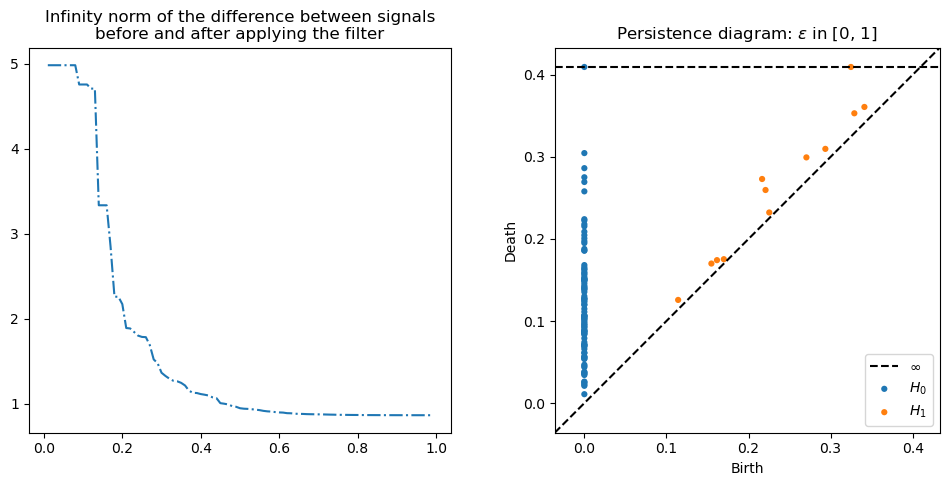

In [223]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

ax[0].set_title('Infinity norm of the difference between signals' + '\n' + 'before and after applying the filter')
ax[1].set_title(r'Persistence diagram: $\epsilon$ in [0, 1]')

ax[0].plot(np.arange(0.01, 1, 0.01), max_differences, '-.')
plot_diagrams(diagrams)
# plt.savefig('imgs/test1/error_and_persistence')

In [214]:
import imageio

In [220]:
# usar as imagens salvas acima para fazer um gif
# images = []
# filenames = ['imgs/test1/' + str(i) + '.png' for i in range(1, 100)]
# for filename in filenames:
#     images.append(imageio.imread(filename))
# imageio.mimsave('gifs/test1/tdagft.gif', images)